# SURVIVAL PREDICTED OF TITANIC PASSENGER

## Import libraries

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Get the Data

**Use pandas to read train.csv as a dataframe called df.**

In [42]:
df = pd.read_csv('train.csv')

**Check out the info(), head(), and describe() methods on df.**

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [47]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [49]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Exploratory Data Analysis

### Handle Missing Data

In [52]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Some columns have missing values, such as Age, Cabin, and Embarked. Let's handle these:
* **Age**: Use median to fill missing values.

In [55]:
df.fillna({'Age': df['Age'].median()}, inplace=True)

* **Embarked**: Use mode to fill missing values.

In [58]:
df.fillna({'Embarked': df['Embarked'].mode()[0]}, inplace=True)

* **Cabin**: Since most values are missing, you can drop this column.

In [61]:
df.drop('Cabin', axis=1, inplace=True)

In [63]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## Handle Duplicated Values

In [66]:
df.duplicated().sum()

0

No dupllicated values.

## Visualization

Let's do some data visualization! We'll use seaborn and pandas built-in plotting capabilities.

**1. Visualize how many passengers survived vs. how many didn't**

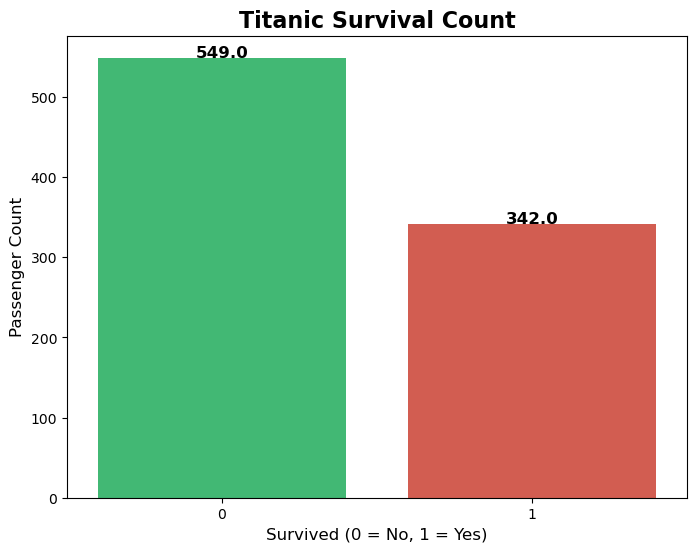

In [71]:
# Create a figure with a specific size
plt.figure(figsize=(8, 6))

# Create the count plot using hue instead of palette directly
ax = sns.countplot(x='Survived', hue='Survived', data=df, palette=['#2ecc71', '#e74c3c'], legend=False)

# Add title and labels
plt.title('Titanic Survival Count', fontsize=16, fontweight='bold')
plt.xlabel('Survived (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Passenger Count', fontsize=12)

# Annotate bar counts
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', fontsize=12, color='black', fontweight='bold')

# Display the plot
plt.show()

The Titanic dataset's **Survived** column has the following distribution:
- 0 (Not Survived): 549 passengers
- 1 (Survived): 342 passengers

To determine if this is **balanced** or **imbalanced**, we can calculate the proportion of each class:
- Proportion of passengers who did not survive: $\frac{549}{891} = 61.6\%$
- Proportion of passengers who survived: $\frac{342}{891} = 38.4\%$

A **balanced dataset** typically has an approximately equal number of instances in each class (e.g., close to 50/50).

Since there are significantly more passengers who did not survive (61.6%) than those who did survive (38.4%), this dataset is **slightly imbalanced**. It's not a severe imbalance, but it still could affect the performance of some machine learning models, especially if you're using classifiers that are sensitive to class imbalance (e.g., decision trees or logistic regression). Techniques like **resampling**, **class weighting**, or **using specialized algorithms** can help if needed.

**2. Pclass (Passenger Class) vs Survived**

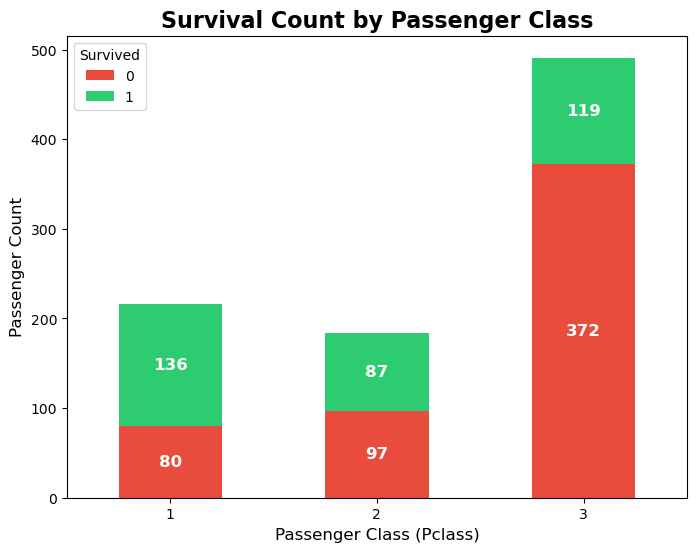

In [75]:
# Create a crosstab of Pclass vs Survived
pclass_survived = pd.crosstab(df['Pclass'], df['Survived'])

# Plotting the stacked bar plot
fig, ax = plt.subplots(figsize=(8, 6))

# Plot each bar segment
pclass_survived.plot(kind='bar', stacked=True, color=['#e74c3c', '#2ecc71'], ax=ax)

# Add title and labels
ax.set_title('Survival Count by Passenger Class', fontsize=16, fontweight='bold')
ax.set_xlabel('Passenger Class (Pclass)', fontsize=12)
ax.set_ylabel('Passenger Count', fontsize=12)

# Annotate the bars
for p in ax.patches:
    # Get the width, height, and x, y coordinates of each patch (bar segment)
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    
    # Only annotate bars with a height > 0
    if height > 0:
        ax.text(x + width / 2, 
                y + height / 2, 
                f'{int(height)}',  # Annotate with the integer value
                ha='center', 
                va='center', 
                fontsize=12, 
                color='white', 
                fontweight='bold')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=0)

# Display the plot
plt.show()

The crosstab data shows the relationship between passenger class (`Pclass`) and survival (`Survived`). Here’s how to interpret the data and derive insights:
### Insights:

1. **Survival Rate by Class**:
   - **Pclass 1**: Out of 216 passengers, 136 survived (63.0%), and 80 did not. This indicates a strong survival rate among first-class passengers.
   - **Pclass 2**: Out of 184 passengers, 87 survived (47.3%), while 97 did not. The survival rate is lower compared to first class but still substantial.
   - **Pclass 3**: Out of 491 passengers, only 119 survived (24.2%), with 372 not surviving. This class has the lowest survival rate, indicating that third-class passengers were at a significant disadvantage.

2. **Class Disparity**:
   - The stark difference in survival rates suggests that socio-economic factors influenced survival during the Titanic disaster. Passengers in higher classes had better access to lifeboats, priority in evacuations, and likely fewer barriers to escaping the ship.
   - First-class passengers were more likely to survive than those in lower classes, showcasing a socio-economic disparity in access to safety.

3. **Potential Influences**:
   - **Access to Lifeboats**: Higher-class cabins were located closer to the lifeboats, which may have facilitated quicker access during the evacuation.
   - **Societal Norms**: Cultural norms at the time often prioritized the evacuation of women and children, particularly in higher classes, which may have also influenced survival rates.
   - **Health and Safety**: First-class passengers likely had better overall health and fewer challenges compared to those in lower classes, contributing to higher survival rates.

4. **Recommendations for Further Analysis**:
   - **Demographic Analysis**: Explore the relationship between age, gender, and survival rates across different classes to understand if certain demographics were more likely to survive.
   - **Impact of Other Variables**: Investigate the impact of other factors, such as fare paid, family size (using SibSp and Parch), and ticket class on survival.
   - **Visualization**: Create visual representations (like a stacked bar plot or survival rate plots) to better illustrate these insights and enhance understanding.

### Conclusion:
The analysis of `Pclass` and survival rates from the Titanic dataset clearly indicates that socio-economic status had a significant impact on survival. Passengers in higher classes had a much higher likelihood of surviving, reflecting broader societal inequalities that influenced the outcomes during this tragic event.

**3. Sex vs Survived**

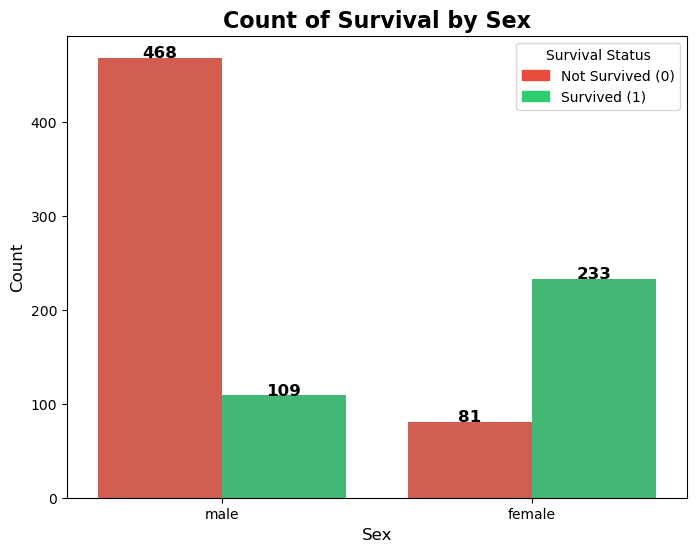

In [79]:
# Create the count plot
plt.figure(figsize=(8,6))
ax = sns.countplot(x='Sex', hue='Survived', legend=False, 
                   data=df, palette=['#e74c3c', '#2ecc71'])

# Add title and labels
plt.title('Count of Survival by Sex', fontsize=16, fontweight='bold')
plt.xlabel('Sex', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Annotate the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline',
                fontsize=12, color='black', fontweight='bold')

# Create custom legend
from matplotlib.patches import Patch
legend_labels = [Patch(color='#e74c3c', label='Not Survived (0)'), 
                 Patch(color='#2ecc71', label='Survived (1)')]
plt.legend(handles=legend_labels, title='Survival Status', 
           loc='upper right')

# Show the plot
plt.show()

### Insights:
1. **Survival Rate by Gender**:
   - **Female survival rate**: Out of 314 females, 233 survived. This is about 74.2%.
   - **Male survival rate**: Out of 577 males, 109 survived. This is about 18.9%.
   
   This shows that females had a significantly higher chance of survival compared to males.

2. **Non-Survivor Distribution**:
   - A large proportion of non-survivors were males (468 out of 549 total non-survivors, around 85.2%).
   - Only 81 females did not survive, making up about 14.8% of the non-survivors.

3. **Survival Influence by Gender**:
   - Gender was a **strong indicator of survival**. Women were prioritized for lifeboats, which is a plausible explanation for the much higher survival rate among females compared to males.
   - The significant gap between male and female survival rates suggests that the “women and children first” protocol was in effect during the Titanic disaster.

**4. Age Distribution**

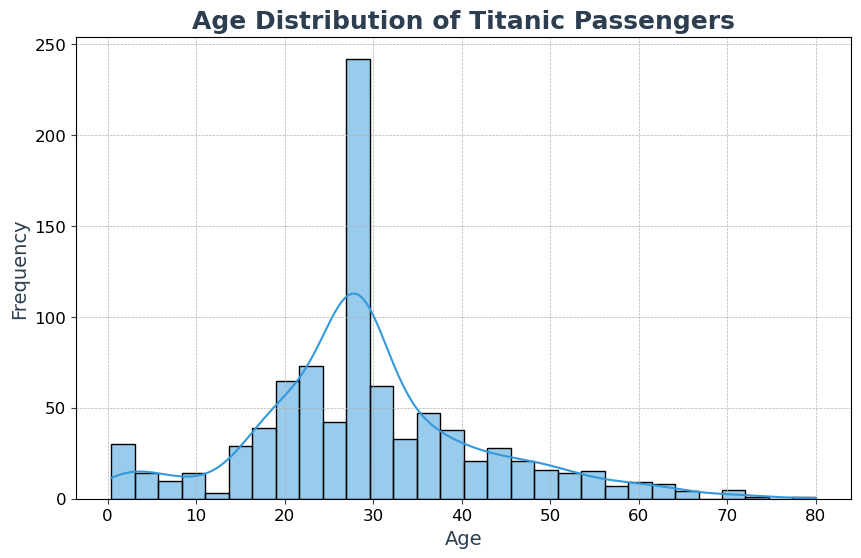

In [84]:
plt.figure(figsize=(10,6))
ax = sns.histplot(df['Age'].dropna(), bins=30, kde=True, color='#3498db',
                 edgecolor='black')
plt.title('Age Distribution of Titanic Passengers', fontsize=18, 
         fontweight='bold', color='#2c3e50')
plt.xlabel('Age', fontsize=14, color='#2c3e50')
plt.ylabel('Frequency', fontsize=14, color='#2c3e50')

# Customize the ticks
ax.tick_params(color='#2c3e50', labelsize=12)

# Add gridlines for readability
ax.grid(True, which='major', linestyle='--', linewidth=0.5)

plt.show()

**5. Age vs Survived**

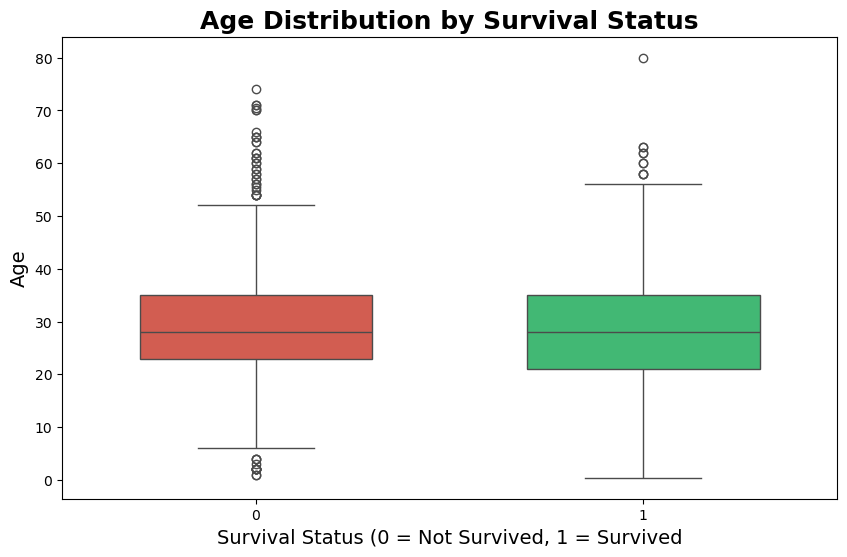

In [87]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Survived', y='Age', hue='Survived', data=df, 
            palette=['#e74c3c', '#2ecc71'], legend=False, width=0.6)
plt.title('Age Distribution by Survival Status', fontsize=18, 
          fontweight='bold')
plt.xlabel('Survival Status (0 = Not Survived, 1 = Survived', fontsize=14)
plt.ylabel('Age', fontsize=14)
plt.show()

Looking at the boxplot of **Age vs. Survival Status** from the Titanic dataset, here’s how we can interpret it:

### General Insights:
1. **Median Age**:
   - **Non-survivors (0)** have a median age slightly below 30.
   - **Survivors (1)** have a median age slightly below 30.
   - This suggests that age does not have a drastic difference in survival outcome, but it is noticeable that survivors tend to be slightly younger on average.

2. **Spread (IQR)**:
   - The **IQR (Interquartile Range)** for **non-survivors** is from around 22 to 38 years. For **survivors**, the IQR is from around 21 to 38 years.
   - The spread (IQR) for both survivors and non-survivors is quite similar, indicating that most passengers fell within a similar age range, regardless of survival.

3. **Whiskers**:
   - The **whiskers** show the range of the main age data (within 1.5 times the IQR):
     - Non-survivors: The whiskers extend from about 1 to 50 years old.
     - Survivors: The whiskers extend from about 1 to 50 years old as well.
   - This implies that the majority of passengers were between 1 and 50 years old, with the bulk in their 20s and 30s.

4. **Outliers**:
   - There are several **outliers** in both categories:
     - **Non-survivors** have some elderly passengers (in their 60s and 70s), which are plotted as outliers.
     - **Survivors** also have some older individuals, but not as many extreme outliers as the non-survivor group.
   - Both groups have very young passengers (close to age 0), which are within the main data spread.

### Conclusion:
- While both groups show a similar spread of ages, there is a slight tendency for **younger passengers to survive**, as indicated by the lower median age of survivors.
- **Age alone** might not be a strong factor, but it could still play a role in survival, especially for outliers (such as very young or older passengers).

**6. Fare vs Survived**

**a. Violin Plot (Fare vs Survived)**

This type of plot will allow us to see the distribution of fares across both survival categories (0 and 1), providing a visual sense of how much passengers paid in each category.

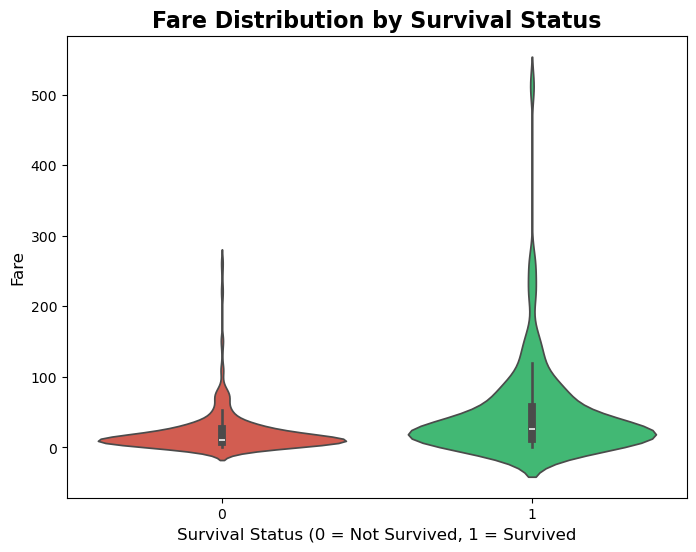

In [94]:
plt.figure(figsize=(8,6))
sns.violinplot(x='Survived', y='Fare', hue='Survived', data=df, 
               legend=False, palette=['#e74c3c', '#2ecc71'])
plt.title('Fare Distribution by Survival Status', fontsize=16, fontweight='bold')
plt.xlabel('Survival Status (0 = Not Survived, 1 = Survived', fontsize=12)
plt.ylabel('Fare', fontsize=12)
plt.show()

**b. Boxplot (Fare vs Survived)**   
Alternatively, we can create a boxplot, which will highlight the median fare and any outliers, along with a sense of the overall spread.

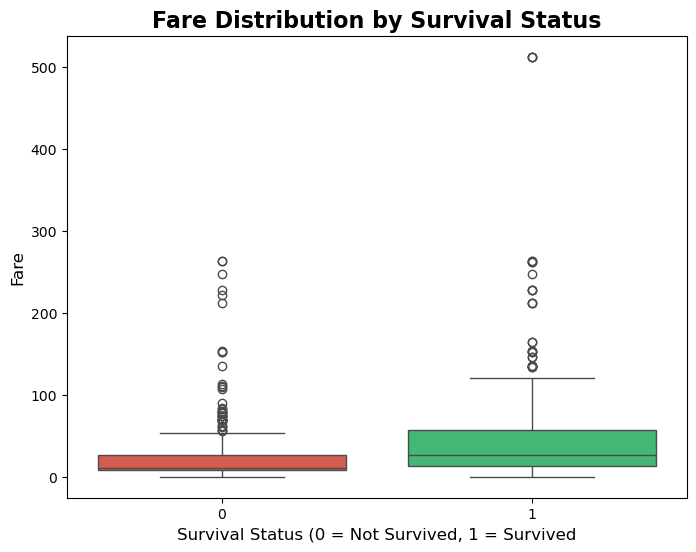

In [97]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Survived', y='Fare', hue='Survived', data=df, 
            legend=False, palette=['#e74c3c', '#2ecc71'])
plt.title('Fare Distribution by Survival Status', fontsize=16, fontweight='bold')
plt.xlabel('Survival Status (0 = Not Survived, 1 = Survived', fontsize=12)
plt.ylabel('Fare', fontsize=12)
plt.show()

**7. Embarked vs Survived**

**What**: Compare survival rates based on embarkation port (C = Cherbourg, Q = Queenstown, S = Southampton).

**Why**: Different embarkation points might have differing survival rates due to socio-economic factors.

**What We’ll Learn**: How embarkation port influenced survival, which could be tied to socio-economic status.

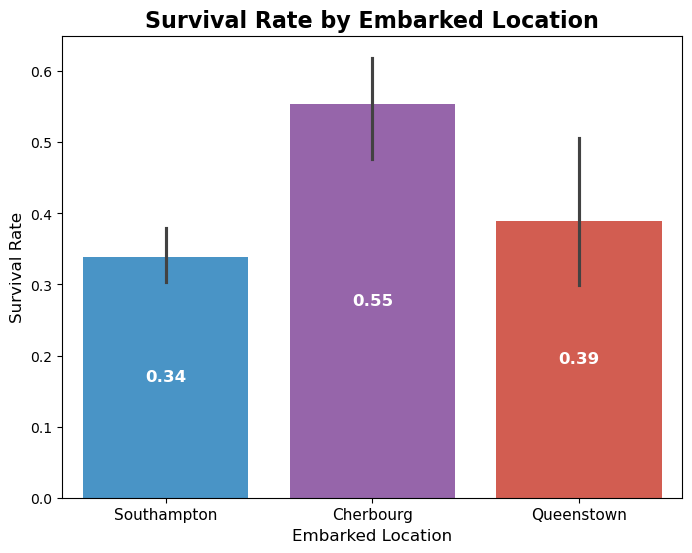

In [101]:
plt.figure(figsize=(8,6))
ax = sns.barplot(x='Embarked', y='Survived', hue='Embarked', data=df, 
            palette=['#3498db', '#9b59b6', '#e74c3c'])
plt.title('Survival Rate by Embarked Location', fontsize=16, 
          fontweight='bold')
plt.xlabel('Embarked Location', fontsize=12)
plt.ylabel('Survival Rate', fontsize=12)

# Customize x-ticks for better readability
label_mapping = {'C': 'Cherbourg', 'Q': 'Queenstown', 'S': 'Southampton'}
new_labels = [label_mapping.get(item, item) for item in df['Embarked'].dropna().unique()]
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(new_labels, fontsize=11)

# Annotate the bars
for p in ax.patches:
    # Get the width, height, and x, y coordinates of each patch (bar segment)
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()

    # Only annotate bars with a height > 0
    if height > 0:
        ax.text(x + width / 2, y + height / 2, f'{height:.2f}',
                ha = 'center', va = 'center', fontsize = 12,
                color = 'white', fontweight = 'bold')

plt.show()

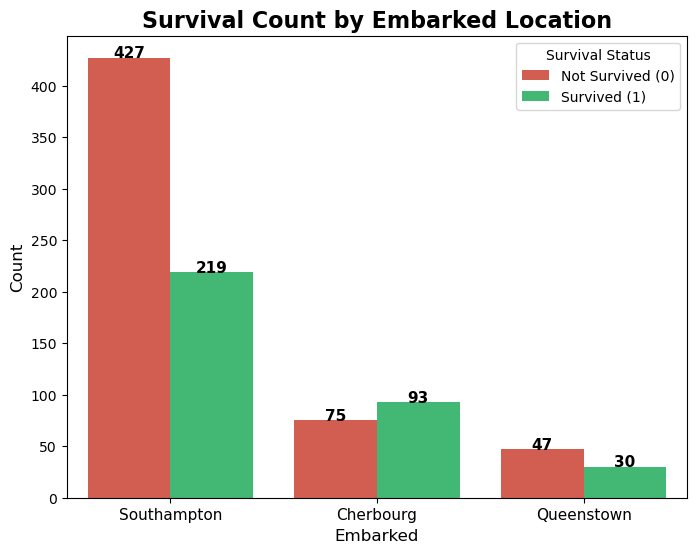

In [103]:
plt.figure(figsize=(8,6))
ax = sns.countplot(x='Embarked', hue='Survived', data=df,
            palette=['#e74c3c', '#2ecc71'], legend=False)

plt.title('Survival Count by Embarked Location', fontsize=16, 
          fontweight='bold')
plt.xlabel('Embarked', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Get the unique tick positions and their corresponding labels
tick_positions = ax.get_xticks()
original_labels = df['Embarked'].dropna().unique() # Get unique values in the order of appearance

# Create a mapping from original values to the full names
label_mapping = {'C': 'Cherbourg', 'Q': 'Queenstown', 'S': 'Southampton'}

# Apply the new labels automatically based on the unique values
ax.set_xticks(tick_positions)
ax.set_xticklabels([label_mapping.get(item, item) for item in original_labels], 
                    fontsize=11)

for p in ax.patches:
    height = int(p.get_height())
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='baseline', fontsize=11, 
                fontweight='bold', color='black')

plt.legend(title='Survival Status', loc='upper right', 
           labels=['Not Survived (0)', 'Survived (1)'])

plt.show()

**8. Correlation Heatmap**

**What**: Show the correlation between numerical features and survival.

**Why**: This helps you identify which numerical features (e.g., Fare, Age, Pclass) are most correlated with survival.

**What We’ll Learn**: You can quickly identify features that strongly influence survival outcomes.

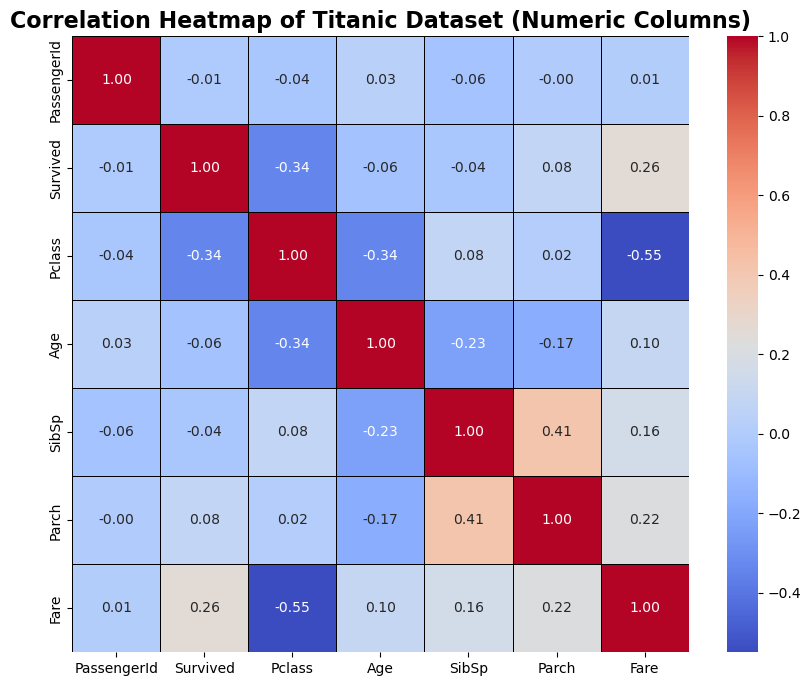

In [106]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            linewidth=0.5, linecolor='black', cbar=True, square=True)
plt.title('Correlation Heatmap of Titanic Dataset (Numeric Columns)', 
          fontsize=16, fontweight='bold')
plt.show()

A correlation heatmap helps we visualize the strength and direction of relationships between numeric variables in your dataset. Here's how to interpret the heatmap:

### Key Points:
1. **Correlation Coefficients**: 
   - Correlation values range from **-1** to **1**.
   - A correlation close to **1** means a strong positive relationship (as one variable increases, the other also increases).
   - A correlation close to **-1** means a strong negative relationship (as one variable increases, the other decreases).
   - A correlation of **0** means no linear relationship between the variables.

2. **Color Representation**:
   - Typically, **red** shades represent positive correlations, while **blue** shades represent negative correlations. The deeper the color, the stronger the correlation.
   - **White or light colors** indicate a weak or no correlation.

3. **Diagonal Line (Perfect Correlation)**:
   - The diagonal line from the top-left to the bottom-right of the heatmap always has values of **1.00**, as every variable is perfectly correlated with itself.

### Example from the Titanic Dataset:
Let's say your correlation heatmap looks at `Survived`, `Age`, `Fare`, and `Pclass`:

- **Survived vs Pclass**: If you see a correlation like **-0.34**, this indicates a **negative relationship**. It suggests that higher-class passengers (lower `Pclass` value) had a better chance of survival.
  
- **Survived vs Fare**: A positive correlation, such as **0.26**, implies that passengers who paid a higher fare were more likely to survive (though not a strong correlation, it's still notable).

- **Age vs Survived**: A correlation of **-0.08** suggests that age doesn't have a strong linear correlation with survival, but there is a slight trend where younger passengers might have had better survival chances.

### Understanding Relationships:
- **Strong Positive** (near +1): Variables increase together.
  - Example: If `Fare` and `Pclass` had a correlation close to **1**, it would mean that higher fares were generally associated with first-class passengers.
  
- **Strong Negative** (near -1): One variable increases while the other decreases.
  - Example: A strong negative correlation between `Survived` and `Pclass` (which you may see in the Titanic dataset) would indicate that lower-class passengers (higher `Pclass` value) had lower survival rates.
  
- **Weak or No Correlation** (near 0): Little or no linear relationship between the variables.
  - Example: If `Age` and `Survived` have a correlation close to 0, it indicates that age alone is not a strong predictor of survival.

### Insights:
By reading the heatmap, you can quickly spot which features have strong relationships, either positive or negative, and which ones don't contribute much to understanding the target variable (e.g., `Survived`). This helps in feature selection and understanding the dataset better.

## Feature Engineering

* Create new features, such as FamilySize by combining SibSp and Parch.

In [110]:
df['FamilySize'] = df['SibSp'] + df['Parch']
df.drop(['SibSp', 'Parch'], axis=1, inplace=True)

* Convert categorical columns like Sex and Embarked to numeric.

In [113]:
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True, dtype=int)
df.head()

,PassengerId,Survived,Pclass,Name,Age,Ticket,Fare,FamilySize,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,A/5 21171,7.2500,1,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,PC 17599,71.2833,1,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,STON/O2. 3101282,7.9250,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,113803,53.1000,1,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,373450,8.0500,0,1,0,1


## Select Features and Target
The target is Survived, and you will select relevant features to use for the model.

In [116]:
X = df[['Pclass', 'Age', 'Fare', 'FamilySize', 'Sex_male', 'Embarked_Q', 'Embarked_S']]
y = df['Survived']

## Split the Data
Split the data into training and test sets.

In [119]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Train a Random Forest Classifier.

In [123]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### Make Predictions

In [126]:
rf_pred = rf_model.predict(X_test)

### Evaluate the Model

Accuracy: 0.8268156424581006
Confusion Matrix:
 [[91 14]
 [17 57]]


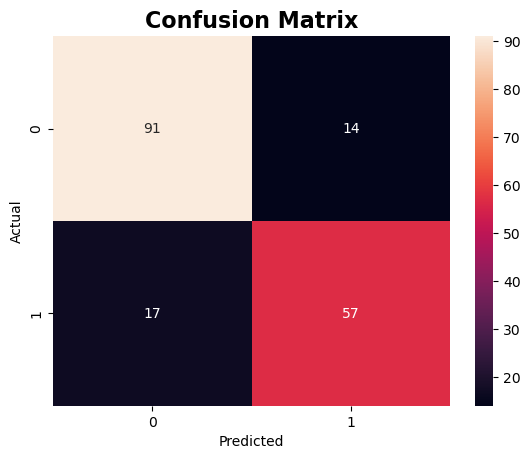


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.87      0.85       105
           1       0.80      0.77      0.79        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



In [129]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Accuracy
print("Accuracy:", accuracy_score(y_test, rf_pred))

# Confusion Matrix
rf_conf_matrix = confusion_matrix(y_test, rf_pred)
print('Confusion Matrix:\n', rf_conf_matrix)
sns.heatmap(rf_conf_matrix, annot=True, fmt='d')
plt.title('Confusion Matrix', fontsize=16, fontweight='bold')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
print('\nClassification Report:')
print(classification_report(y_test, rf_pred))

Here's a breakdown of what the model's evaluation metrics (accuracy, confusion matrix, precision, recall, and F1-score) mean:

1. **Accuracy: 0.8268**
   - Accuracy measures the proportion of correct predictions over the total number of predictions.
   - In this case, your model has an **accuracy of 82.68%**, which means that **82.68% of the predictions were correct**.

2. **Confusion Matrix**:
   The confusion matrix provides a detailed look at how well your model performs for each class:
   ```
   [[91 14]
    [17 57]]
   ```
   - The rows represent the actual classes (0 and 1), and the columns represent the predicted classes (0 and 1).
   
   - **True Negatives (TN):** `91` (correctly predicted class 0)
   - **False Positives (FP):** `14` (incorrectly predicted class 1, when it was class 0)
   - **False Negatives (FN):** `17` (incorrectly predicted class 0, when it was class 1)
   - **True Positives (TP):** `57` (correctly predicted class 1)

3. **Precision**:
   Precision is the proportion of true positive predictions over all predicted positives:
   - **Precision for class 0**: $ \frac{91}{91+14} = 0.84 $ (84%)
     - This means that **84% of the times** your model predicted **class 0**, it was actually correct.
   - **Precision for class 1**: $ \frac{57}{57+17} = 0.80 $ (80%)
     - This means that **80% of the times** your model predicted **class 1**, it was correct.

4. **Recall**:
   Recall is the proportion of true positive predictions over all actual positives:
   - **Recall for class 0**: $ \frac{91}{91+17} = 0.87 $ (87%)
     - This means your model correctly identified **87% of the actual class 0** instances.
   - **Recall for class 1**: $ \frac{57}{57+14} = 0.77 $ (77%)
     - This means your model correctly identified **77% of the actual class 1** instances.

5. **F1-Score**:
   F1-Score is the harmonic mean of precision and recall, giving you a balance between the two:
   - **F1-Score for class 0**: $ 0.85 $ (balance between precision and recall for class 0)
   - **F1-Score for class 1**: $ 0.79 $ (balance between precision and recall for class 1)

6. **Support**:
   - **Support for class 0**: 105 (there are 105 actual instances of class 0)
   - **Support for class 1**: 74 (there are 74 actual instances of class 1)

**Summary**:
- Your model performs better at predicting class 0 (non-survivors) than class 1 (survivors), with higher precision and recall for class 0.
- The overall accuracy of 82.68% is a good sign, but the performance on class 1 (survivors) could be improved since the recall for class 1 is only 77%, meaning the model misses some survivors.

### Feature Importances

The `feature_importances_` attribute is most commonly associated with tree-based models, especially the **Random Forest** model, but it is not exclusive to random forests.

In [136]:
# Get feature importances
rf_importances = rf_model.feature_importances_

# Create a DataFrame to view the feature importance with corresponding feature names
feature_importances_df = pd.DataFrame({
    'Feature': X_train.columns, # Assuming X_train is a DataFrame with feature names as columns
    'Importance': rf_importances
}).sort_values(by='Importance', ascending=False)

feature_importances_df

,Feature,Importance
2,Fare,0.277469
4,Sex_male,0.274173
1,Age,0.254857
0,Pclass,0.085200
3,FamilySize,0.077595
6,Embarked_S,0.022156
5,Embarked_Q,0.008550


<function matplotlib.pyplot.show(close=None, block=None)>

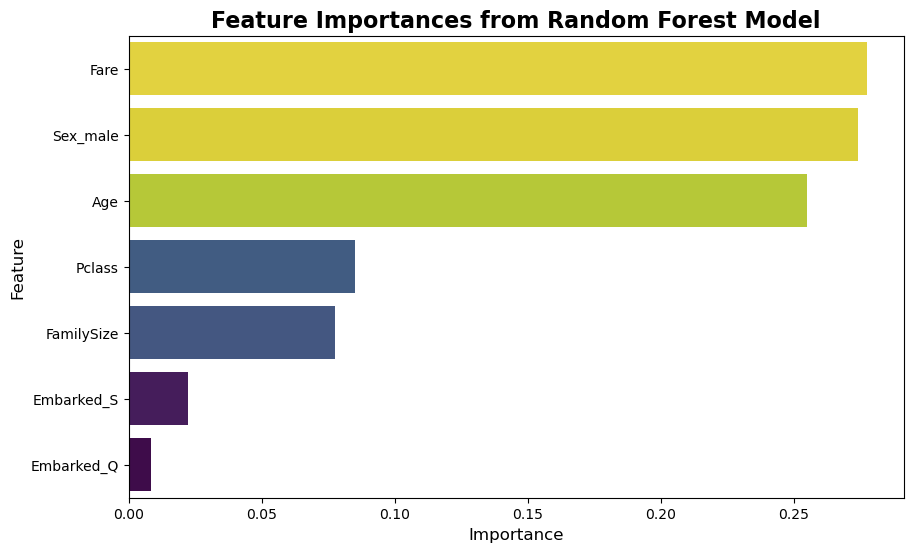

In [138]:
# Plot feature importances
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', hue='Importance', 
            data=feature_importances_df, palette='viridis', legend=False)
plt.title('Feature Importances from Random Forest Model', fontsize=16, fontweight='bold')
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.show

Here’s how to interpret the feature importances from Random Forest model:

1. **Fare (0.277469)**: This is the most important feature in predicting survival according to your Random Forest model. Passengers who paid higher fares might have had a better chance of survival (e.g., they may have been in first class).
   
2. **Sex_male (0.274173)**: The second most important feature is gender. Being male significantly impacts survival probability, and historically, women were more likely to survive due to the "women and children first" policy.

3. **Age (0.254857)**: Age is also a crucial factor. Younger passengers, especially children, may have had a better chance of survival.

4. **Pclass (0.085200)**: Passenger class (1st, 2nd, 3rd) also influences survival. Those in 1st class had a higher survival rate, and this feature shows moderate importance.

5. **FamilySize (0.077595)**: The size of the passenger’s family on board affects survival. Those traveling with family members might have had better chances of survival.

6. **Embarked_S (0.022156) and Embarked_Q (0.008550)**: The embarkation port has the least importance. Where passengers boarded (Southampton, Cherbourg, or Queenstown) doesn’t play as significant a role in predicting survival.

### Insights:
- **Fare** and **Sex** are the top contributors to survival prediction.
- **Age** and **Pclass** also hold notable weight but are less influential than Fare and Sex.
- **FamilySize** has some influence, while **Embarked** is the least significant feature.

These feature importances highlight the factors the model relies on most for prediction, helping you better understand the driving factors behind the survival rates in the Titanic dataset.

## Train a Decision Tree Model

Accuracy: 0.7821229050279329
Confusion Matrix:
 [[84 21]
 [18 56]]


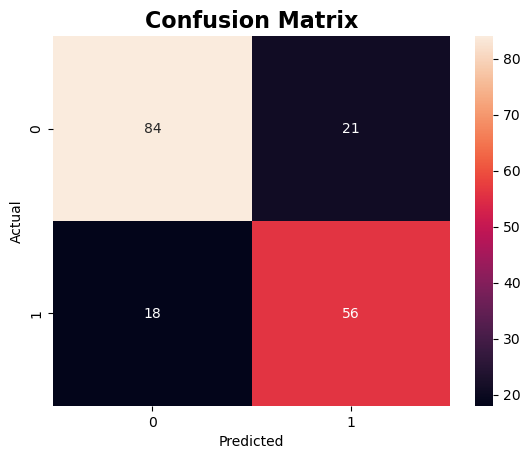


Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       105
           1       0.73      0.76      0.74        74

    accuracy                           0.78       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.78      0.78      0.78       179



In [142]:
#Import Required Libraries
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Make Predictions the Model
dt_pred = dt_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, dt_pred)
print(f'Accuracy: {accuracy}')

# Confusion Matrix
dt_conf_matrix = confusion_matrix(y_test, dt_pred)
print('Confusion Matrix:\n', dt_conf_matrix)
sns.heatmap(dt_conf_matrix, annot=True, fmt='d')
plt.title('Confusion Matrix', fontsize=16, fontweight='bold')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
print('\nClassification Report:')
print(classification_report(y_test, dt_pred))

Model's evaluation metrics, including the confusion matrix and classification report, provide insights into the **performance** of a Decision Tree model.

### 1. **Accuracy**: 
- The accuracy of the model is **0.782** (78.2%). This means that 78.2% of the predictions made by the model are correct. However, accuracy alone may not be sufficient to evaluate the model, especially when the classes are imbalanced.

### 2. **Confusion Matrix**: 
```
[[84 21]
 [18 56]]
```
- **True Negatives (TN)**: 84 — The model correctly predicted 84 passengers who did not survive (Survived = 0).
- **False Positives (FP)**: 21 — The model incorrectly predicted 21 passengers as surviving, but they did not (Survived = 0).
- **False Negatives (FN)**: 18 — The model predicted 18 passengers as not surviving, but they actually survived (Survived = 1).
- **True Positives (TP)**: 56 — The model correctly predicted 56 passengers who survived.

### 3. **Precision, Recall, F1-Score**:
#### For Class 0 (Did Not Survive):
- **Precision (0.82)**: Of all passengers the model predicted as not surviving, 82% actually did not survive.
- **Recall (0.80)**: The model correctly identified 80% of the passengers who did not survive.
- **F1-Score (0.81)**: The harmonic mean of precision and recall, indicating good performance for class 0.

#### For Class 1 (Survived):
- **Precision (0.73)**: Of all passengers the model predicted as surviving, 73% actually survived.
- **Recall (0.76)**: The model correctly identified 76% of the passengers who survived.
- **F1-Score (0.74)**: The performance for class 1 is slightly lower than for class 0.

### 4. **Imbalance Observation**:
Class 0 (Did Not Survive) has more samples than Class 1 (Survived), which can impact model performance. This is why class 0 has higher precision and recall compared to class 1.

### **Summary**:
The model performs reasonably well, especially for predicting passengers who did not survive. However, it could be improved for better precision and recall for passengers who survived.

### Visualize the Decision Tree

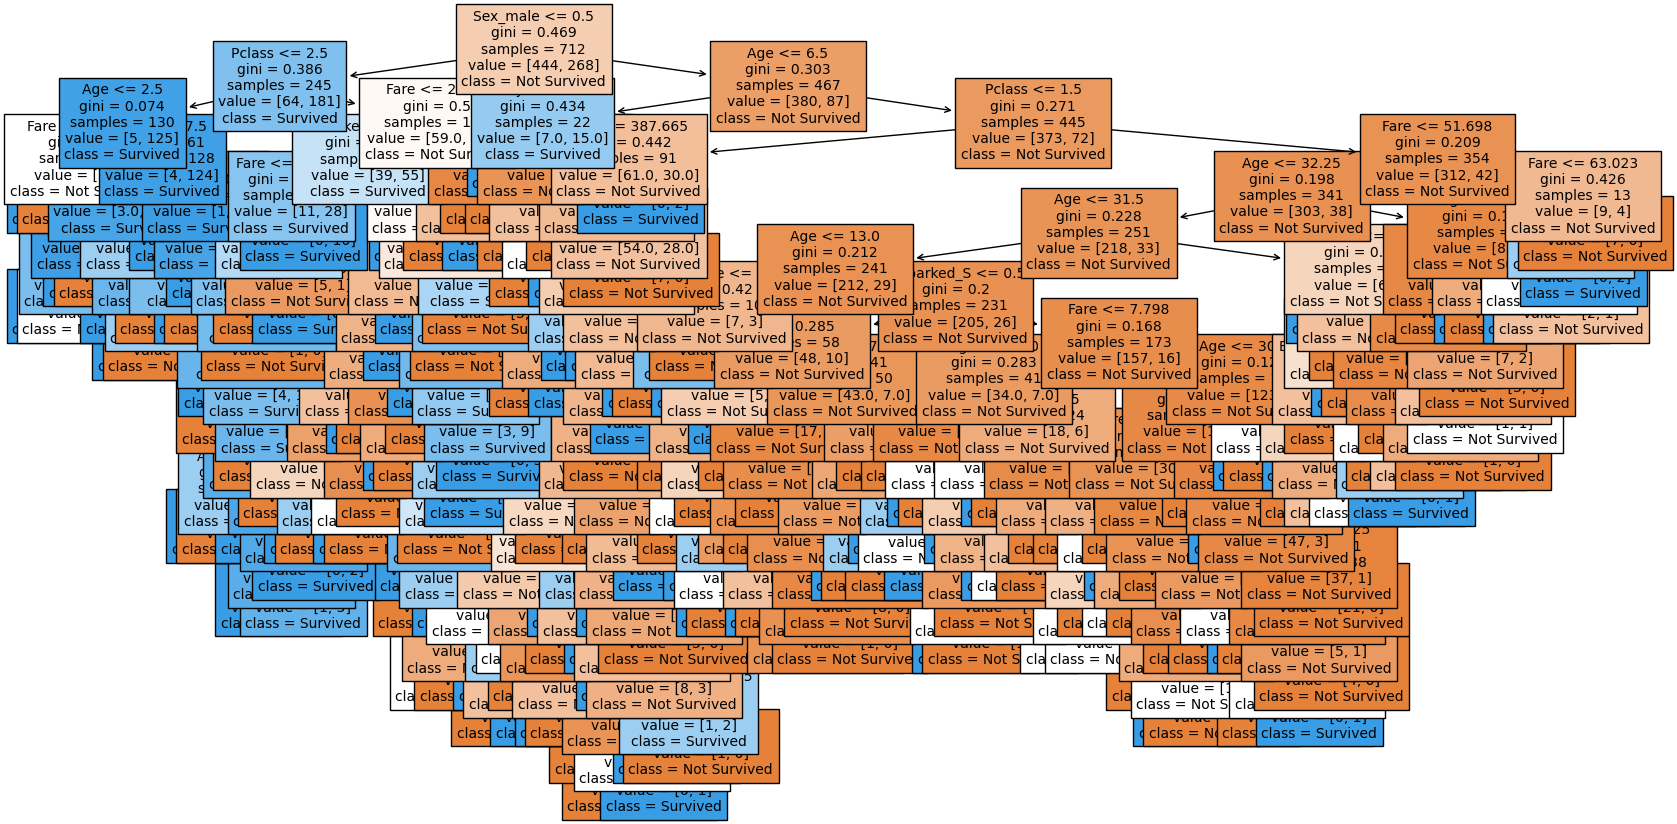

In [146]:
from sklearn import tree

plt.figure(figsize=(20,10))
tree.plot_tree(dt_model, feature_names=X.columns, 
               class_names=['Not Survived', 'Survived'], filled=True, 
               fontsize=10)
plt.show()

### Feature Importance

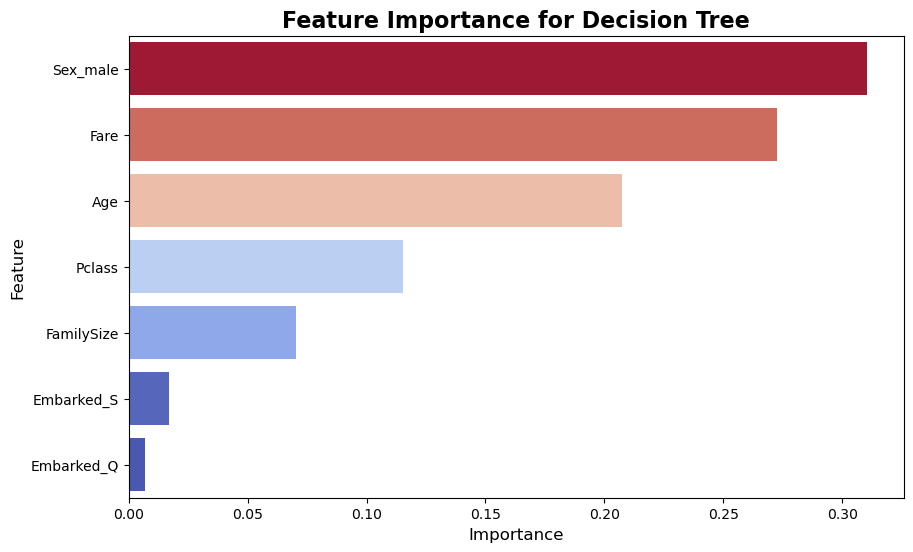

In [149]:
dt_importances = pd.Series(dt_model.feature_importances_, index=X.columns)
dt_importances = dt_importances.sort_values(ascending=False)

# Plot the feature importances
plt.figure(figsize=(10,6))
sns.barplot(x=dt_importances, y=dt_importances.index, 
            hue=dt_importances, palette="coolwarm", legend=False)
plt.title('Feature Importance for Decision Tree', fontsize=16, 
          fontweight='bold')
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.show()

Here is an interpretation of your **feature importances** for the Decision Tree model. These values indicate how much each feature contributes to the prediction of survival on the Titanic.

### Feature Importances Analysis

1. **Sex (Sex_male)**: Importance = **0.310**
   - This feature has the highest importance, meaning **gender (male or female)** plays a significant role in predicting survival. Historically, females had a higher survival rate, likely influencing the model’s predictions.

2. **Fare**: Importance = **0.273**
   - The fare paid by a passenger is also influential. Higher fares were associated with wealthier passengers who may have had better access to lifeboats, contributing to their survival chances.

3. **Age**: Importance = **0.208**
   - Age is also significant, suggesting that younger passengers had better chances of survival. This importance might reflect the tendency to prioritize children in rescue efforts.

4. **Pclass (Passenger Class)**: Importance = **0.115**
   - Passenger class affects survival, as **first-class passengers** generally had better access to safety measures. 

5. **FamilySize**: Importance = **0.070**
   - Family size indicates whether a passenger traveled alone or with family. Those with families might have different survival dynamics, though this feature is relatively less important.

6. **Embarked (Embarked_S, Embarked_Q)**: Importance = **0.017 and 0.007**
   - The port of embarkation has a minor impact, implying little difference in survival chances based on the embarkation point.

### Insights
- The model relies heavily on **Sex, Fare, and Age** for predictions, which aligns with the historical survival patterns on the Titanic.
- Lower importance for **FamilySize** and **Embarked** suggests these features have a smaller impact on survival in this model.

## Comparison of the Random Forest and Decision Tree Models

### 1. **Accuracy and Overall Performance**
- **Random Forest**: Achieved an accuracy of 82.7%, which is higher than the Decision Tree.
- **Decision Tree**: Achieved an accuracy of 78.2%, slightly lower, likely due to being more prone to overfitting compared to the ensemble approach of Random Forest.

### 2. **Precision, Recall, and F1-Score**
  - For **class 0 (non-survivors)**:
    - **Random Forest** has a precision of 0.84, recall of 0.87, and F1-score of 0.85.
    - **Decision Tree** has a slightly lower precision of 0.82, recall of 0.80, and F1-score of 0.81.
  
  - For **class 1 (survivors)**:
    - **Random Forest** performs slightly better, with a precision of 0.80, recall of 0.77, and F1-score of 0.79.
    - **Decision Tree** has a precision of 0.73, recall of 0.76, and F1-score of 0.74, slightly lower across the board.

  - **Insight**: The Random Forest model performs better overall, particularly for class 0, as well as slightly better at predicting class 1 (survivors). This likely indicates that the Random Forest model generalizes better than the single Decision Tree, which can be prone to variance.

### 3. **Confusion Matrix**
- **Random Forest**: Correctly predicted 91 out of 105 non-survivors (class 0) and 57 out of 74 survivors (class 1), with fewer misclassifications.
- **Decision Tree**: Had more misclassifications, particularly for class 0, where 21 were misclassified as survivors (class 1).

### 4. **Feature Importances**
- **Top Features for Random Forest**:
  - **Fare** (27.7%), **Sex_male** (27.4%), and **Age** (25.5%) were the top contributing features.
  - **Pclass** (8.5%) and **FamilySize** (7.8%) were important but contributed less.
  
- **Top Features for Decision Tree**:
  - **Sex_male** was the most important (31%), followed by **Fare** (27.3%) and **Age** (20.8%).
  - **Pclass** and **FamilySize** had some influence but lower than the top three.
  
- **Insight**: Both models find **Sex_male**, **Fare**, and **Age** to be the most predictive features, though Random Forest distributes importance a bit more evenly. This even distribution may contribute to Random Forest’s higher generalization performance.

### 5. **Model Choice**
  - **Random Forest** is preferable for this dataset due to its higher accuracy, better generalization, and slightly more balanced feature importance distribution.
  - **Decision Tree** could still be useful if interpretability and simplicity are critical, as it’s a single model without the averaging seen in Random Forests.

Overall, the **Random Forest model outperforms the Decision Tree** in terms of accuracy and predictive metrics, likely due to its ensemble nature which stabilizes predictions across multiple trees, reducing overfitting. The higher feature importance for **Sex_male**, **Fare**, and **Age** across both models also provides insight into the key predictors for survival in the Titanic dataset.

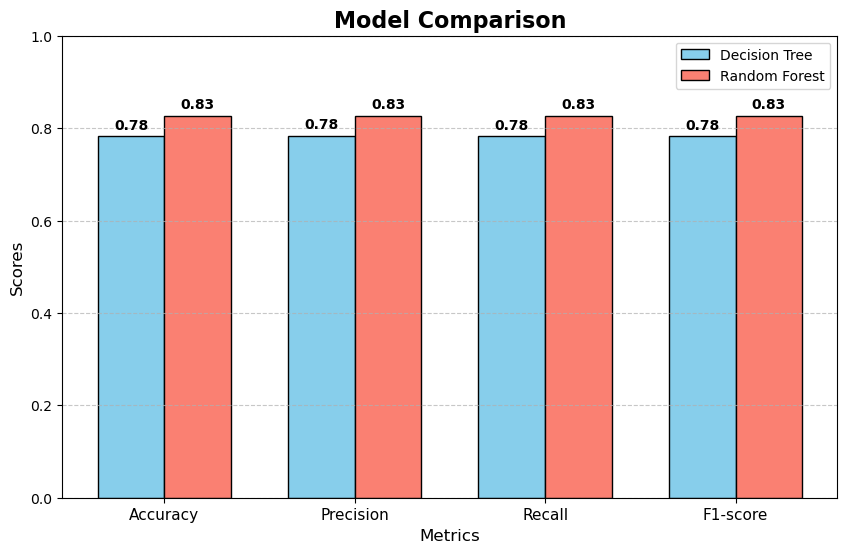

In [154]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define the metrics and calculate scores for both models
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
dt_metrics = [
    accuracy_score(y_test, dt_pred),
    precision_score(y_test, dt_pred, average='weighted'),
    recall_score(y_test, dt_pred, average='weighted'),
    f1_score(y_test, dt_pred, average='weighted')
]
rf_metrics = [
    accuracy_score(y_test, rf_pred),
    precision_score(y_test, rf_pred, average='weighted'),
    recall_score(y_test, rf_pred, average='weighted'),
    f1_score(y_test, rf_pred, average='weighted')
]

# Plotting
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(metrics))

# Create the bars for each model
bars_dt = plt.bar(index - bar_width/2, dt_metrics, bar_width, label='Decision Tree', color='skyblue', edgecolor='black')
bars_rf = plt.bar(index + bar_width/2, rf_metrics, bar_width, label='Random Forest', color='salmon', edgecolor='black')

# Add annotations for each bar
for bar in bars_dt + bars_rf:
    height = bar.get_height()
    plt.annotate(f'{height:.2f}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # offset for the annotation text
                 textcoords="offset points",
                 ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')

# Final touches
plt.xlabel('Metrics', fontsize=12)
plt.ylabel('Scores', fontsize=12)
plt.title('Model Comparison', fontsize=16, fontweight='bold')
plt.xticks(index, metrics, fontsize=11)
plt.ylim(0, 1)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The bar chart effectively compares the performance metrics (Accuracy, Precision, Recall, and F1-score) of the Decision Tree and Random Forest models. The Random Forest model consistently outperforms the Decision Tree across all metrics, achieving higher scores (0.83) compared to the Decision Tree's scores (0.78). This visualization highlights the overall advantage of the Random Forest model in terms of classification performance on this dataset. 

Let's break down the metrics and interpret what they mean in the context of your model performance.

### Interpretation of Metrics

1. **Accuracy**
   - **Definition**: Accuracy is the proportion of correct predictions (both true positives and true negatives) out of all predictions.
   - **Interpretation**: Random Forest achieved an accuracy of **83%**, whereas the Decision Tree had **78%**. This suggests that the Random Forest model correctly classified a higher proportion of observations. Higher accuracy in Random Forest can be attributed to the ensemble effect, where multiple trees reduce variance and improve generalization.

2. **Precision**
   - **Definition**: Precision (for a specific class) is the proportion of true positive predictions out of all positive predictions made by the model.
   - **Interpretation**: Random Forest achieved a higher precision (0.83 vs. 0.78 for the Decision Tree). Precision is particularly important when you want to minimize false positives. In this context, Random Forest might be a better choice if you want more confidence that when it predicts a specific class (like survival), it’s likely correct.

3. **Recall**
   - **Definition**: Recall is the proportion of true positive predictions out of all actual positive instances.
   - **Interpretation**: Both Random Forest and Decision Tree performed the same in terms of recall (0.83 for Random Forest vs. 0.78 for Decision Tree). This indicates that Random Forest is better at capturing more actual positives, which can be valuable when missing a positive case (e.g., a survivor) is costly.

4. **F1-score**
   - **Definition**: F1-score is the harmonic mean of precision and recall, balancing the two metrics.
   - **Interpretation**: Random Forest had a higher F1-score (0.83 vs. 0.78 for Decision Tree), meaning it provides a better balance between precision and recall. This is particularly useful if both false positives and false negatives have significant consequences.

   Overall, **Random Forest is outperforming the Decision Tree in all four metrics**. This suggests that Random Forest is a more robust model for this dataset, likely because it reduces overfitting by averaging multiple trees and thus provides better generalization on unseen data.

### Summary

**Model Performance**: Random Forest outperformed the Decision Tree across all metrics, suggesting it’s a better choice for balanced and reliable predictions.

The **Random Forest’s ensemble approach** enables it to capture a wider set of patterns, which explains its stronger performance and better utilization of multiple features to make balanced predictions. If interpretability is important, the Decision Tree’s simple structure is easier to understand, but for accuracy and reliability, Random Forest is the better model.